<a href="https://colab.research.google.com/github/Hwarriach/KMeans/blob/main/Employee_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

# **EDA**

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [10]:
df.iloc[:,1]


0         1000
1         1000
2         1000
3         1000
4         1000
          ... 
683272    4300
683273    4300
683274    4300
683275    4300
683276    4300
Name: Job Family Code, Length: 683277, dtype: object

In [11]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [12]:
# Dropping 'Union Code" & 'Union' columns as they have mostly missing values. 
# Dropping other irrelevant columns

df = df.drop(['Job Family Code', 'Job Code', 'Year Type', 'Organization Group', 'Department Code', 'Department', 'Job Family', 'Job', 'Year', 'Employee Identifier', 'Union', 'Union Code'], axis=1)

In [13]:
# Converting remaining columns to numerical format

for feature in df.columns: # Loop through all columns in the dataframe 

    if df[feature].dtype == 'object': # Only apply for columns with categorical strings 

        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer 

         

In [14]:
df.dtypes

Organization Group Code      int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

# **KMeans Analysis**

In [15]:
from sklearn.cluster import KMeans


In [16]:
# Elbow Method to determine an ideal number for K

wcss = []

for i in range(2,8):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

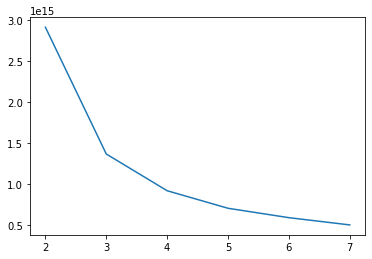

In [17]:
plt.plot(range(2,8), wcss)

In [18]:
X = df.iloc[:,:].values #extracting all rows and columns into a numpy array
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

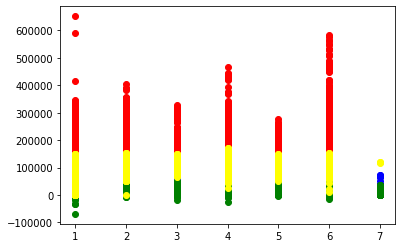

In [19]:
plt.scatter(X[y_means==0,0],X[y_means==0,1], color='blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1], color='red')
plt.scatter(X[y_means==2,0],X[y_means==2,1], color='green')
plt.scatter(X[y_means==3,0],X[y_means==3,1], color='yellow')

Average Silhoutette Score

In [20]:
from sklearn.metrics import silhouette_score
from matplotlib import cm

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
silhouette_score(X, labels, metric='euclidean')

0.5309065887436629